In [1]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Your code to read data
data=pd.read_csv('student_performances.csv')

# Your code to print first few samples of the dataset.
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


In [4]:
#Converting the columns ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.



data = pd.get_dummies(data, columns = ['Fjob', 'Mjob', 'reason', 'guardian'])

In [5]:
#Converting other text values in the dataframe to numbers using label encoding.
#Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?
#Next - Print few samples of the data to ensure everything is number except 'grades' column.


from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
## Your code to convert transform sex to the numbers
labelencoder.fit(data['sex'])
data ['sex'] = labelencoder.transform(data['sex'])

## Your code to convert transform address to the numbers
labelencoder.fit(data['address'])
# #
data['address']=labelencoder.transform(data['address'])

## Your code to convert transform famsize to the numbers

labelencoder.fit(data['famsize'])

#
data['famsize']=labelencoder.transform(data['famsize'])


#
## Your code to convert transform Pstatus to the numbers
labelencoder.fit(data['Pstatus'])
#
data['Pstatus']=labelencoder.transform(data['Pstatus'])
#
## Your code to convert transform schoolsup to the numbers
labelencoder.fit(data['schoolsup'])
#
data['schoolsup']=labelencoder.transform(data['schoolsup'])
#
## Your code to convert transform famsup to the numbers
labelencoder.fit(data['famsup'])
#
data['famsup']=labelencoder.transform(data['famsup'])
## Your code to convert transform paid to the numbers
labelencoder.fit(data['paid'])
data['paid']=labelencoder.transform(data['paid'])
## Your code to convert transform activities to the numbers
labelencoder.fit(data['activities'])
#
data['activities']=labelencoder.transform(data['activities'])
## Your code to convert transform nursery to the numbers
labelencoder.fit(data['nursery'])
data['nursery']=labelencoder.transform(data['nursery'])
## Your code to convert transform higher to the numbers
labelencoder.fit(data['higher'])
data['higher']=labelencoder.transform(data['higher'])
## Your code to convert transform internet to the numbers
labelencoder.fit(data['internet'])
data['internet']=labelencoder.transform(data['internet'])
## Your code to convert transform romantic to the numbers
labelencoder.fit(data['romantic'])
data['romantic']=labelencoder.transform(data['romantic'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

In [8]:
#Separate input X and output y.
#X is the all columns except 'grades'.
#y is 'grades' column.

# Your code to get X from data
X=data[['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
     'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]
# Your code to get y from data
y=data['grades']

In [10]:
# Your code to get y from data
y=data['grades']
#Next - Split data into train and test set.


from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
#
# Print shapes of train and test data to make sure everyhing is in order.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 42)
(79, 42)
(316,)
(79,)


In [17]:
#Next - Develop a SVM classifier and fit into the train dataset.

label_encoder = LabelEncoder()

# Encode the categorical variables in the training set
X_train_encoded = X_train.copy()
for column in X_train_encoded.columns:
    X_train_encoded[column] = label_encoder.fit_transform(X_train_encoded[column])

In [19]:
# Create an SVM classifier with the RBF kernel
classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
classifier.fit(X_train_encoded, y_train)


SVC()

In [20]:
#Next - predict the values on the input test set.
#Find accuracy, precision, recall, f-score.

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the categorical variables in the training set
X_train_encoded = X_train.copy()
for column in X_train_encoded.columns:
    X_train_encoded[column] = label_encoder.fit_transform(X_train_encoded[column])

# Encode the categorical variables in the test set
X_test_encoded = X_test.copy()
for column in X_test_encoded.columns:
    X_test_encoded[column] = label_encoder.transform(X_test_encoded[column])

# Create an SVM classifier with the RBF kernel
classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
classifier.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_encoded)

# Compute evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print("Accuracy test set:", accuracy)
print("Precision test set:", precision)
print("Recall test set:", recall)
print("F-score test set:", f1)

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy test set: 0.34177215189873417
Precision test set: 0.34177215189873417
Recall test set: 0.34177215189873417
F-score test set: 0.34177215189873417
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        10
        good       0.00      0.00      0.00        10
        poor       0.35      1.00      0.51        27
satisfactory       0.00      0.00      0.00        16
   very good       0.00      0.00      0.00        16

    accuracy                           0.34        79
   macro avg       0.07      0.20      0.10        79
weighted avg       0.12      0.34      0.18        79



/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#Find accuracy, precision, recall, and f-score on training dataset.

train_data_predictions = classifier.predict(X_train)

print (print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions)))
print (print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' )))
print (print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' )))
print (print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' )))

print (classification_report(y_train, train_data_predictions))

Accuracy train set:  0.3259493670886076
None
Precision train set:  0.3259493670886076
None
Recall train set:  0.3259493670886076
None
F-score train set:  0.3259493670886076
None
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00        30
        good       0.00      0.00      0.00        52
        poor       0.33      1.00      0.49       103
satisfactory       0.00      0.00      0.00        87
   very good       0.00      0.00      0.00        44

    accuracy                           0.33       316
   macro avg       0.07      0.20      0.10       316
weighted avg       0.11      0.33      0.16       316



/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


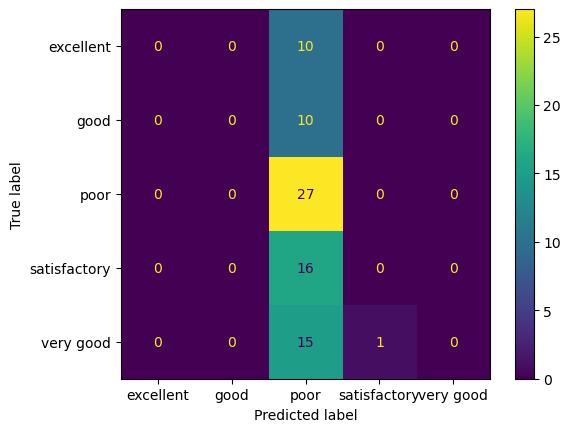

In [22]:
#Display confusion matrix between actual and predicted values on the test data.
#

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#  Your code to display confusion matrix between predicted output and actual output
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

Accuracy with linear kernel: 0.35443037974683544
Accuracy with poly kernel: 0.3037974683544304
Accuracy with rbf kernel: 0.25316455696202533
Accuracy with sigmoid kernel: 0.3291139240506329


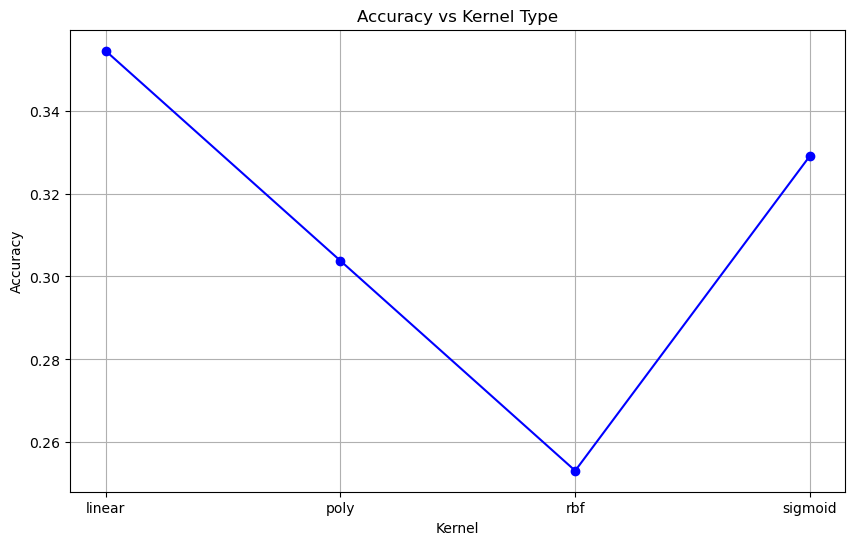

In [37]:
#Earlier, we used rfb Kernel. Now, we will test other kernels too.
#We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.¶
# Define the list of kernels to test
import matplotlib.pyplot as plt

# List of kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# List to store accuracy for each kernel
accuracies = []

# Loop through each kernel type
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    classifier = SVC(kernel=kernel)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate the accuracy and append to the accuracies list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {kernel} kernel: {accuracy}")

#
# Your code to plot accuracy vs kernels
#
plt.figure(figsize=(10, 6))
plt.plot(kernels, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Kernel Type')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [30]:
accuracy_scores


[0.20253164556962025,
 0.34177215189873417,
 0.34177215189873417,
 0.34177215189873417]

In [32]:
precision_scores

[0.20253164556962025,
 0.34177215189873417,
 0.34177215189873417,
 0.34177215189873417]

In [33]:
recall_scores

[0.20253164556962025,
 0.34177215189873417,
 0.34177215189873417,
 0.34177215189873417]

In [34]:
f1_scores

[0.20253164556962025,
 0.34177215189873417,
 0.34177215189873417,
 0.34177215189873417]

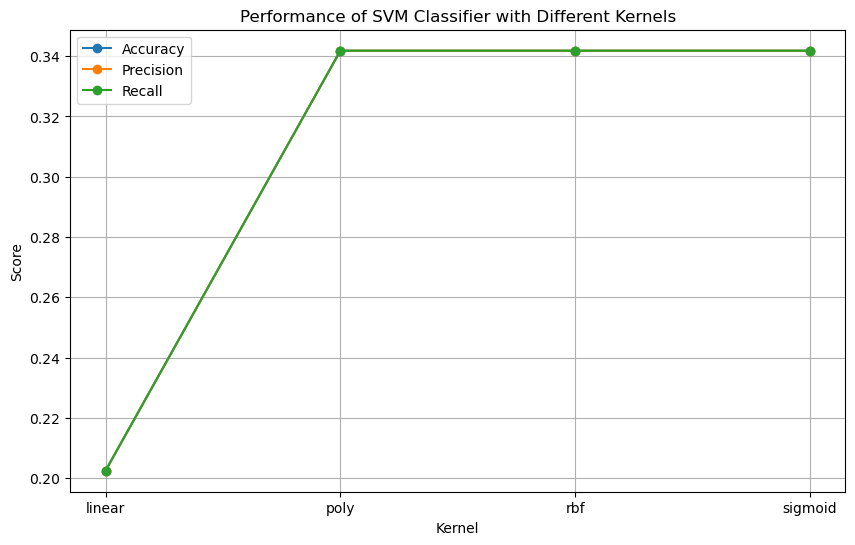

In [36]:
import matplotlib.pyplot as plt

# Plot the evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(kernels, accuracy_scores, marker='o', label='Accuracy')
plt.plot(kernels, precision_scores, marker='o', label='Precision')
plt.plot(kernels, recall_scores, marker='o', label='Recall')
#plt.plot(kernels, f1_scores, marker='o', label='F1-score')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.title('Performance of SVM Classifier with Different Kernels')
plt.legend()
plt.grid(True)
plt.show()